# Decision Tree

# Entropy

Imagine we have a dataset S, of which each data point is labelled to be any of the classes among c1, c2............ cn. If all the data points belongs to one class say c1, the **uncertinity** in the data set is low and hence it has a low entropy. The same way if the data points are spread over different classes from c1 to cn - uncertinity associated with the dataset is high and hence **entropy** is also high.


in mathamatical terms, if p1 is the propotion of data labelled as c1 and etc etc...

 P1,P2,P3,.........Pn are class probabilities

We can compute the entropy associated with the dataset (*H(S)*) by:

**H(S) = -P1 x LOG(P1) - P2 x LOG(P2) - P3 x LOG(P3) ........ Pn x LOG(Pn)**

*with the standard convention of 0 x log(0) = 0*

**Intution**: Validating our theorized entropy equation H(S)

each term -Pnlog(Pn) is always positive, when Pn is either zero or close to 1, -Pnlog(Pn) is close to zero.this means that entropy will be small when every Pn is close to 1 or zero.

In [ ]:
import random
import math
import numpy as np
import pandas as pd
from collections import Counter, defaultdict
from typing import List, Tuple, TypeVar, Dict, Any, NamedTuple, Optional, Union

In [3]:
def entropy(class_probabilities: List[float]) -> float:
    """given a List of class proababilities,returns the calculated entropy"""
    return sum(-p * math.log(p, 2) for p in class_probabilities if p > 0)

In [4]:
# Test
q = entropy([0.8, 0.1, 0.04, 0.04, 0.02])
print("entropy = ", q)

entropy =  1.0741209043760986


In [5]:
def class_probabilities(labels: List[Any]) -> List[float]:
    total_count = len(labels)
    return [count / total_count for count in Counter(labels).values()]

In [6]:
def data_entropy(labels: List[Any]) -> float:
    return entropy(class_probabilities(labels))

In [7]:
# Test
a = data_entropy(["a"])
print(" entropy of a single labeled dataset is =", a)

a = data_entropy(["a", "b"])
print(" entropy of 2 labeled dataset is =", a)

 entropy of a single labeled dataset is = 0.0
 entropy of 2 labeled dataset is = 1.0


# The Entropy of a Partition

Ideally we want a partition to have a low entropy if it splits or partitions the data into subsets that themselfs have low entropy.

**Formulation**:

Mathamatically,if we partiotion our data S in to subsets S1, S2, S3,.........Sn,with proportions Q1, Q2, Q3,....Qn. Now we can compute the entropy of partition as a weighted sum of individual entropies of the partitions

H(S before partition) = 0

H(S after partition) = Q1 * H(S1) + Q2 * H(S2) +.......+ Qn * H(Sn)

In [8]:
def partition_entropy(subsets: List[List[Any]]) -> float:
    """returns the entropy from the partition of data into subsets"""
    total_count = sum(len(subset) for subset in subsets)
    return sum(data_entropy(subset) * len(subset) / total_count for subset in subsets)

# Creating a Decision Tree

In [10]:
class Candidate(NamedTuple):
    level: str  # junior, senior, mid
    lang: str  # python, R, java
    tweets: bool
    phd: bool
    hired: Optional[bool] = None  # Did well on interview - Optional: for allowing unlabeled data in this attribute


inputs=[     #level    #lang  #tweets #phd #did_well
    Candidate('Senior', 'Java', True, False, True),
    Candidate('Junior', 'Python', False, True, False),
    Candidate('Mid', 'R', True, True, True),
    Candidate('Senior', 'Java', False, False, True),
    Candidate('Junior', 'Java', True, False, False),
    Candidate('Mid', 'Python', False, True, True),
    Candidate('Senior', 'R', True, True, False),
    Candidate('Junior', 'Java', False, False, True),
    Candidate('Mid', 'R', True, False, True),
    Candidate('Senior', 'Python', False, True, False),
]

## ID3 Rules:

1. If the data all have same label, create a leaf node that predicts that label and stop

2. if list of attributes are empty(no questions to ask), create a leaf node that predicts the most common label and stop (Using Prob)

3. else try partitioning the data based on each attribute

4. choose a partition that has the minimum possible entropy

5. add a decision node based on the choosen attribute

6. recur this on each partitioned subset using remaining attributes

In [12]:
# partition the data

T = TypeVar("T")  # generic data type for inputs


def partition_by(inputs: List[T], attribute: str) -> Dict[Any, List[T]]:
    """partition the input data in to dictionay of lists based on the speacific attribute"""
    partitions: Dict[Any, List[T]] = defaultdict(list)
    for input in inputs:
        key = getattr(input, attribute)  # value of the speacified attribute
        partitions[key].append(input)
    return partitions

In [13]:
partition_by(inputs,'level')

defaultdict(list,
            {'Senior': [Candidate(level='Senior', lang='Java', tweets=True, phd=False, hired=True),
              Candidate(level='Senior', lang='Java', tweets=False, phd=False, hired=True),
              Candidate(level='Senior', lang='R', tweets=True, phd=True, hired=False),
              Candidate(level='Senior', lang='Python', tweets=False, phd=True, hired=False)],
             'Junior': [Candidate(level='Junior', lang='Python', tweets=False, phd=True, hired=False),
              Candidate(level='Junior', lang='Java', tweets=True, phd=False, hired=False),
              Candidate(level='Junior', lang='Java', tweets=False, phd=False, hired=True)],
             'Mid': [Candidate(level='Mid', lang='R', tweets=True, phd=True, hired=True),
              Candidate(level='Mid', lang='Python', tweets=False, phd=True, hired=True),
              Candidate(level='Mid', lang='R', tweets=True, phd=False, hired=True)]})

In [14]:
# calculate entropy of partitions


def partition_entropy_by(
    inputs: List[T], attribute: str, label_attribute: str
) -> float:
    """compute the entropy corresponding to the given partition"""
    partitions = partition_by(inputs, attribute)
    # print(partitions)
    # but partition_entropy requires just the class labels!!
    labels = [
        [getattr(input, label_attribute) for input in partition]
        for partition in partitions.values()
    ]
    print(labels)
    return partition_entropy(labels)

In [15]:
partition_entropy_by(inputs, "level", "hired")

[[True, True, False, False], [False, False, True], [True, True, True]]


0.6754887502163469

In [16]:
partition_entropy_by(inputs, "hired", "hired")

[[True, True, True, True, True, True], [False, False, False, False]]


0.0

In [17]:
partition_entropy_by(inputs, "lang", "hired")

[[True, True, False, True], [False, True, False], [True, False, True]]


0.875488750216347

In [18]:
for key in ["level", "lang", "tweets", "phd", "hired"]:
    print(key, partition_entropy_by(inputs, key, "hired"))

[[True, True, False, False], [False, False, True], [True, True, True]]
level 0.6754887502163469
[[True, True, False, True], [False, True, False], [True, False, True]]
lang 0.875488750216347
[[True, True, False, False, True], [False, True, True, True, False]]
tweets 0.9709505944546686
[[True, True, False, True, True], [False, True, True, False, False]]
phd 0.8464393446710154
[[True, True, True, True, True, True], [False, False, False, False]]
hired 0.0


In [19]:
senior_inputs = [input for input in inputs if input.level == "Senior"]
senior_inputs

[Candidate(level='Senior', lang='Java', tweets=True, phd=False, hired=True),
 Candidate(level='Senior', lang='Java', tweets=False, phd=False, hired=True),
 Candidate(level='Senior', lang='R', tweets=True, phd=True, hired=False),
 Candidate(level='Senior', lang='Python', tweets=False, phd=True, hired=False)]

In [20]:
for key in ["lang", "tweets", "phd"]:
    print(key, partition_entropy_by(senior_inputs, key, "hired"))

[[True, True], [False], [False]]
lang 0.0
[[True, False], [True, False]]
tweets 1.0
[[True, True], [False, False]]
phd 0.0


In [21]:
junior_inputs = [input for input in inputs if input.level == "Junior"]
junior_inputs

[Candidate(level='Junior', lang='Python', tweets=False, phd=True, hired=False),
 Candidate(level='Junior', lang='Java', tweets=True, phd=False, hired=False),
 Candidate(level='Junior', lang='Java', tweets=False, phd=False, hired=True)]

In [22]:
for key in ["lang", "tweets", "phd"]:
    print(key, partition_entropy_by(junior_inputs, key, "hired"))

[[False], [False, True]]
lang 0.6666666666666666
[[False, True], [False]]
tweets 0.6666666666666666
[[False], [False, True]]
phd 0.6666666666666666


In [23]:
lang_is_java = [input for input in junior_inputs if input.lang == 'Java']
lang_is_java

[Candidate(level='Junior', lang='Java', tweets=True, phd=False, hired=False),
 Candidate(level='Junior', lang='Java', tweets=False, phd=False, hired=True)]

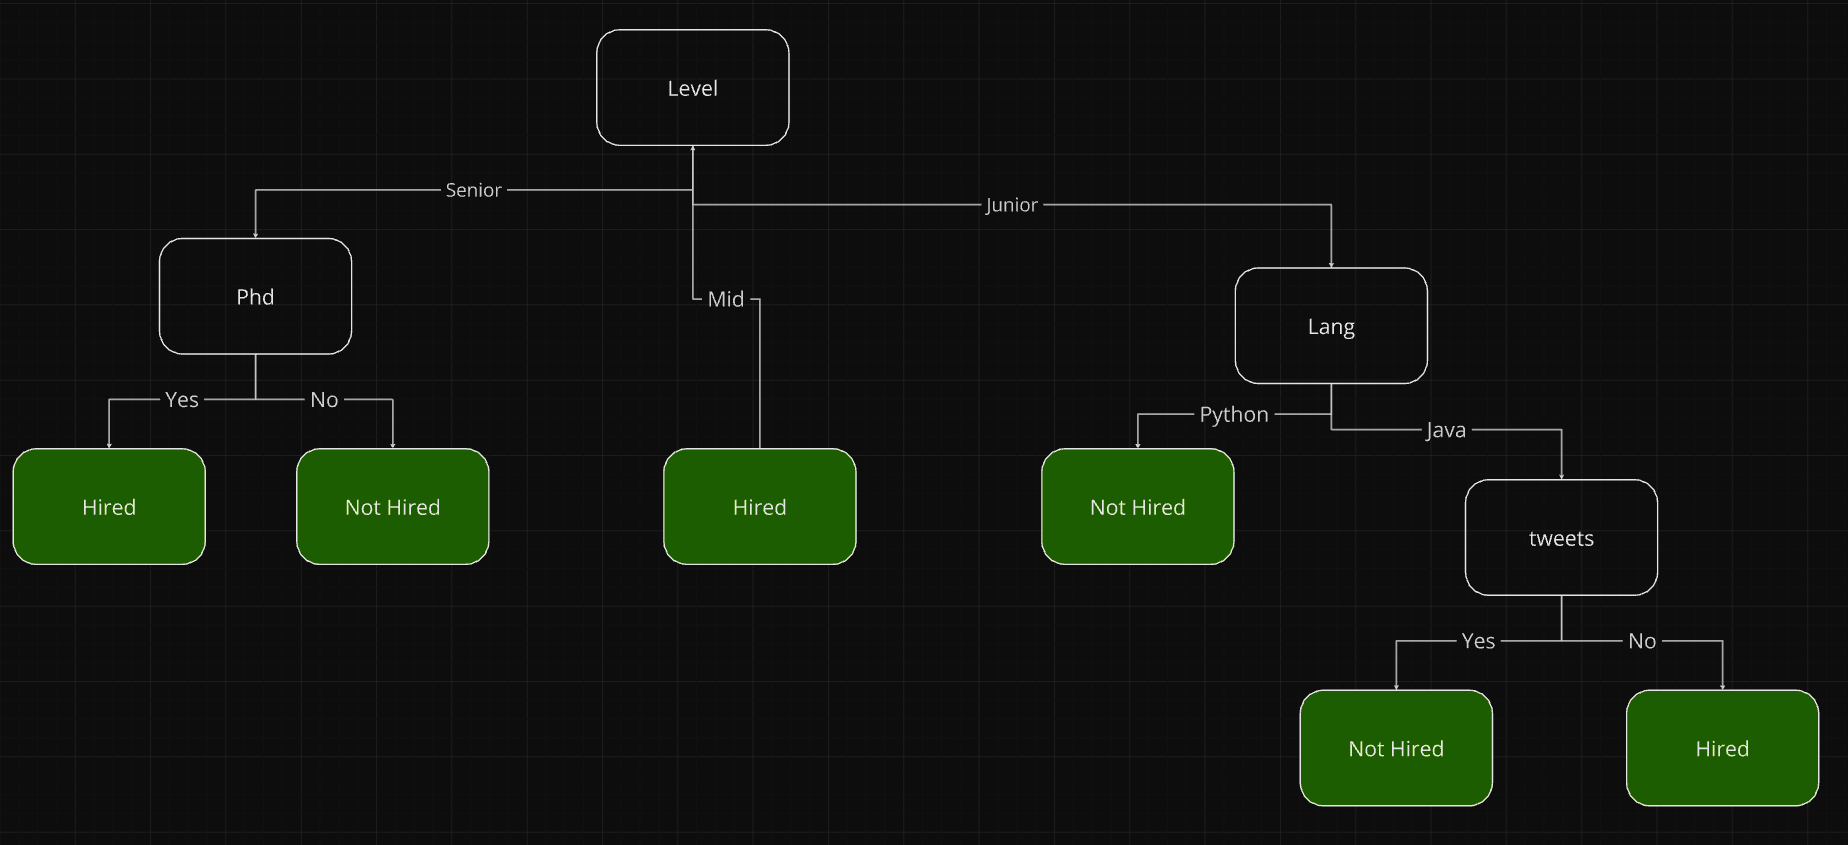

# Putting it all together

WE define our tree to be either a Leaf or a Split.

Leaf: an element of tree that predicts a single value.

Split: containing an attribute to split on to subtrees for speacific values of that attribute,and possible a default value to use when we have an unknown value

In [ ]:
class Leaf(NamedTuple):
    value: Any


class Split(NamedTuple):
    attribute: str
    subtrees: dict
    default_value: Any = None


DecisionTree = Union[Leaf, Split]

Testing on other larger dataset

In [25]:
class Candidate(NamedTuple):
    level: str  # junior, senior, mid
    lang: str  # python, R, java
    tweets: bool
    phd: bool
    hired: Optional[bool] = None  # Did well on interview - Optional: for allowing unlabeled data in this attribute


inputs=[     #level    #lang  #tweets #phd   #Hired
    Candidate('Senior', 'Java', True, False, True),
    Candidate('Junior', 'Python', False, True, False),
    Candidate('Mid', 'R', True, True, True),
    Candidate('Senior', 'Java', False, False, True),
    Candidate('Junior', 'Java', True, False, False),
    Candidate('Mid', 'Python', False, True, True),
    Candidate('Senior', 'R', True, True, False),
    Candidate('Junior', 'Java', False, False, True),
    Candidate('Mid', 'R', True, False, True),
    Candidate('Senior', 'R', True, False, True),
    Candidate('Senior', 'Rust', False, False, True),
    Candidate('Senior', 'Python', False, True, False),
    Candidate('Intern', 'Python', False, False, False),
    Candidate('Intern', 'Python', True, False, True),
    Candidate('Fresher', 'Python', False, False, False),
    Candidate('Fresher', 'Python', False, False, False),
    Candidate('Fresher', 'Java', False, False, False),
    Candidate('Fresher', 'Python', False, False, False),
    Candidate('Fresher', 'Python', True, False, False),
    Candidate('Fresher', 'Python', True, True, False),
    Candidate('Fresher', 'Python', True, False, False),
    Candidate('Fresher', 'Python', True, False, False),
    Candidate('Fresher', 'Python', False, True, False),
    Candidate('Fresher', 'Python', False, False, False),
    Candidate('Fresher', None, False, False, False),
    Candidate('Junior', 'Rust', False, True, False),
    Candidate('Junior', 'C', False, True, False),
    Candidate('Mid', 'Rust', False, True, False),
    Candidate('Mid', 'Rust', True, False, True),
    Candidate('Mid', 'C', False, False, False),
    Candidate('Mid', 'C', False, False, True),
    Candidate('Mid', 'C', False, False, None),
    Candidate('Senior', 'C', False, False, False),
    Candidate('Mid', 'C#', False, False, False),
    Candidate('Mid', 'C#', False, False, False),
    Candidate('Junior', 'C#', False, True, False),
    Candidate('Junior', 'C#', False, True, False),
    Candidate('Junior', 'C#', True, True, False),
    Candidate('Junior', 'C++', True, False, True),
    Candidate('Senior', 'C++', True, False, True),
    Candidate('Senior', 'C++', False, True, True),
    Candidate('Senior', 'C++', False, False, True),
]
len(inputs)

42

In [ ]:
# hiring tree would look like
hiring_tree = Split(
    "level",
    {
        "Senior": Split("PHD", {False: Leaf(False), True: Leaf(True)}),
        "Mid": Leaf(True),
        "junior": Split(
            "Language",
            {
                "python": Leaf(True),
                "java": Split("Tweets", {True: Leaf(True), False: Leaf(False)}),
            },
        ),
    },
)

In [27]:
# handling defaulted values
def classify(tree: DecisionTree, input: Any) -> Any:
    """classify the inputs using given decision tree"""
    
    # if ths is a leaf node,return its value
    if isinstance(tree, Leaf):
        return tree.value
    # otherwise,the tree consists of atrributes to split on and a dictinary
    # whose keys are values of that attribute
    # and those values are subtrees for next level
    subtree_key = getattr(input, tree.attribute)
    if subtree_key not in tree.subtrees:
        return (
            tree.default_value
        )  # assigning default value if the key isnt present in subtree keys

    subtree = tree.subtrees[subtree_key]
    return classify(
        subtree, input
    )  # choosing an appropriate subtree and use it to classify

In [28]:
# BUILD THE DECISION TREE REPRESENTATION FROM OUR TRAINING DATA


def build_tree(
    inputs: List[Any], split_attributes: List[Any], target_attribute: str
) -> DecisionTree:
    # count target labels
    label_counts = Counter(getattr(input, target_attribute) for input in inputs)
    most_common_label = label_counts.most_common(1)[0][0]

    # if there is a unique label,predict
    if len(label_counts) == 1:
        return Leaf(most_common_label)

    # if there is no single label and no questions to ask,return most commom label
    if not split_attributes:
        return Leaf(most_common_label)
    # Other wise split by the best attribute or minimum partition entropy

    def split_entropy(attribute: str) -> float:
        """helper function for finding the best attribute"""
        return partition_entropy_by(inputs, attribute, target_attribute)

    best_attribute = min(split_attributes, key=split_entropy)
    partitions = partition_by(inputs, best_attribute)
    new_attributes = [a for a in split_attributes if a != best_attribute]

    # recursively build the subtree
    subtrees = {
        attribute_value: build_tree(subset, new_attributes, target_attribute)
        for attribute_value, subset in partitions.items()
    }

    return Split(best_attribute, subtrees, default_value=most_common_label)